In [52]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
training_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testing_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [10]:
for data in training_set:
    print(data)
    print(data[0].shape)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [24]:
x, y = data[0][1], data[1][1]

In [25]:
print(x.shape)
print(y.shape)

torch.Size([1, 28, 28])
torch.Size([])


In [26]:
x = x.view(28, 28) # reshaping

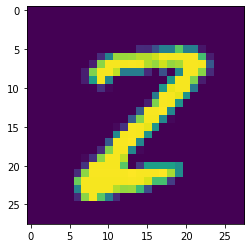

In [27]:
plt.imshow(x)

In [28]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [32]:
for data in training_set:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

In [33]:
print(counter_dict)

{0: 11846, 1: 13484, 2: 11916, 3: 12262, 4: 11684, 5: 10842, 6: 11836, 7: 12530, 8: 11702, 9: 11898}


In [35]:
for i in counter_dict:
    print(f'{i}: {counter_dict[i]/ total*100} %')

0: 19.743333333333332 %
1: 22.473333333333333 %
2: 19.86 %
3: 20.436666666666667 %
4: 19.473333333333333 %
5: 18.07 %
6: 19.726666666666667 %
7: 20.883333333333333 %
8: 19.503333333333334 %
9: 19.830000000000002 %


In [43]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x
        

In [44]:
net = Net()

In [45]:
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [46]:
X = torch.rand((28, 28))

In [48]:
X = X.view(-1, 28*28) # -1 specify unknown for batch size

In [49]:
X.shape

torch.Size([1, 784])

In [50]:
output = net(X)

In [51]:
print(output)

tensor([[-2.4198, -2.1984, -2.3988, -2.3452, -2.3554, -2.2419, -2.2896, -2.2681,
         -2.2654, -2.2661]], grad_fn=<LogSoftmaxBackward>)


In [53]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [56]:
EPOCHS = 3

In [57]:
# training
for epoch in range(EPOCHS):
    for data in training_set:
        # data is a batch of featureset and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1603, grad_fn=<NllLossBackward>)
tensor(0.0337, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBackward>)


In [59]:
# evaluating 
correct = 0
total = 0
with torch.no_grad():
    for data in testing_set:
        # data is a batch of featureset and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", round(correct/total, 3))
    

Accuracy: 0.97


In [60]:
img = data[0][2]
label = data[1][2]

In [61]:
pred = net(img.view(-1, 28*28))

In [63]:
pred = torch.argmax(pred)

tensor(0, grad_fn=<NotImplemented>)


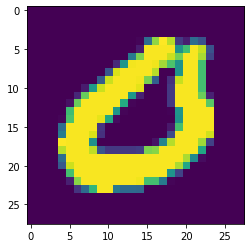

In [68]:
plt.imshow(img.view(28, 28))
print(pred)